Rafael Gonçalves (186062)

In [1]:
import os
import urllib.request
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import csv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

%matplotlib inline

## Download dataset

In [2]:
train_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_treinamento.mat'
validation_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_val.mat'
test_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_teste.mat'
data_dir = os.path.abspath(os.path.relpath('../data'))
train_path = os.path.join(data_dir, 'train.mat')
validation_path = os.path.join(data_dir, 'validation.mat')
test_path = os.path.join(data_dir, 'test.mat')
image_dir = os.path.abspath(os.path.relpath('../doc/images'))

urllib.request.urlretrieve(train_url, train_path)
urllib.request.urlretrieve(validation_url, validation_path)
urllib.request.urlretrieve(test_url, test_path)

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [3]:
train_set = scipy.io.loadmat(train_path)
val_set = scipy.io.loadmat(validation_path)
test_set = scipy.io.loadmat(test_path)

In [4]:
X_train = train_set["X"]
y_train = train_set["y"]
X_val = val_set["Xval"]
y_val = val_set["yval"]
X_test = test_set["Xt"]
y_test = test_set["yt"]

In [5]:
y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
y_test[y_test == -1] = 0

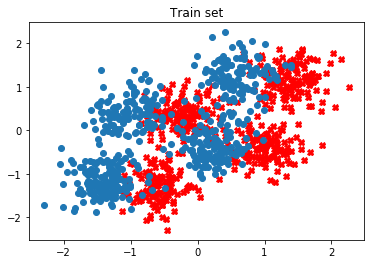

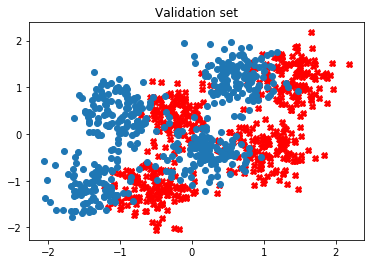

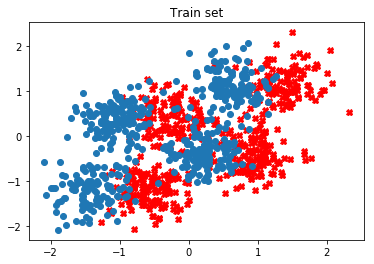

In [6]:
plt.plot(X_train[np.in1d(y_train, 1), 0], X_train[np.in1d(y_train, 1), 1], 'rX')
plt.plot(X_train[np.in1d(y_train, 0), 0], X_train[np.in1d(y_train, 0), 1], 'o')
plt.title("Train set")
plt.show()
plt.plot(X_val[np.in1d(y_val, 1), 0], X_val[np.in1d(y_val, 1), 1], 'rX')
plt.plot(X_val[np.in1d(y_val, 0), 0], X_val[np.in1d(y_val, 0), 1], 'o')
plt.title("Validation set")
plt.show()
plt.title("Train set")
plt.plot(X_test[np.in1d(y_test, 1), 0], X_test[np.in1d(y_test, 1), 1], 'rX')
plt.plot(X_test[np.in1d(y_test, 0), 0], X_test[np.in1d(y_test, 0), 1], 'o')
plt.show()

# 1 - Multilayer Perceptron (MLP)

In [7]:
C = 1 # number of classes
D_in = 2 # dimension of input

learning rate: 0.3


/usr/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Validation set: Avg. loss: 4.2047, Accuracy: 490/1000 (49%)



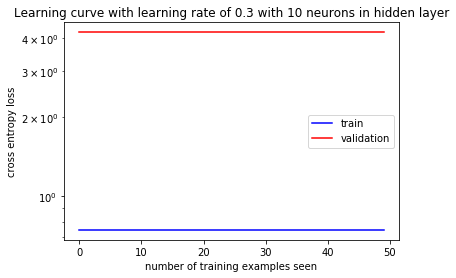

learning rate: 0.1
Validation set: Avg. loss: 0.7097, Accuracy: 510/1000 (51%)



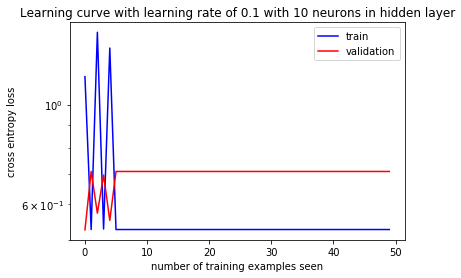

learning rate: 0.06
Validation set: Avg. loss: 0.4802, Accuracy: 714/1000 (71%)



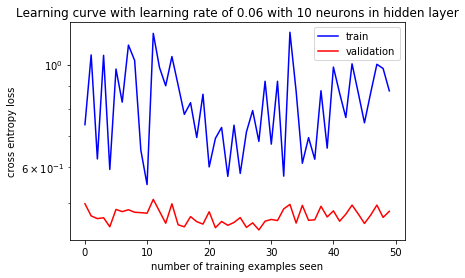

learning rate: 0.03
Validation set: Avg. loss: 0.4126, Accuracy: 767/1000 (77%)



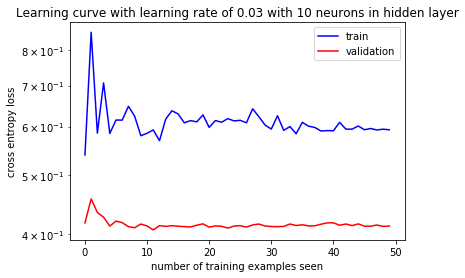

learning rate: 0.01
Validation set: Avg. loss: 0.3092, Accuracy: 878/1000 (88%)



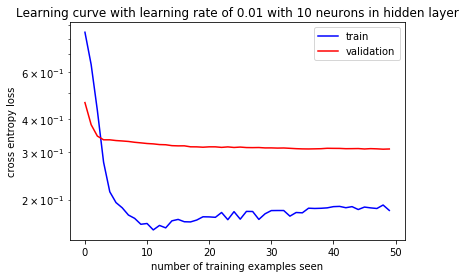

learning rate: 0.03
Validation set: Avg. loss: 0.4073, Accuracy: 751/1000 (75%)



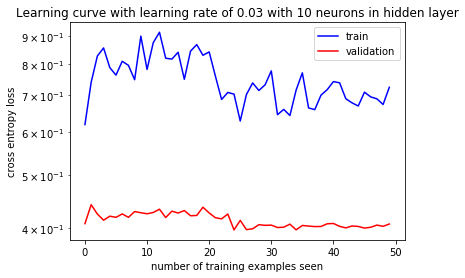

learning rate: 0.06
Validation set: Avg. loss: 0.4601, Accuracy: 700/1000 (70%)



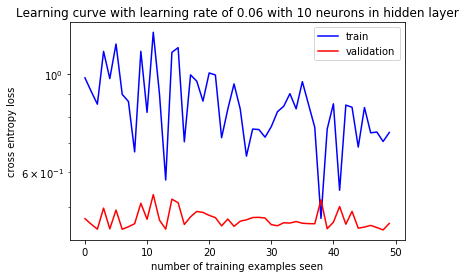

In [8]:
H = 10
epochs = 50

for learning_rate in [0.3, 0.1, 0.06, 0.03, 0.01, 0.03, 0.06]:
    print("learning rate:", learning_rate)
    train_losses = []
    val_losses = []

    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )

    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    model.train()
    for epoch in range(epochs):
        for idx, (x, y) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = model(x)
            loss = F.binary_cross_entropy(output, y, reduction="mean")
            loss.backward()
            optimizer.step()
        train_losses.append(loss.item())
            
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_train, dtype=torch.float),
                                             torch.tensor(y_train, dtype=torch.float)):
                output = model(data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('Validation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with learning rate of {} with 10 neurons in hidden layer'.format(learning_rate))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

H =  3
Train Epoch: 0 Loss: 1.082693
Train Epoch: 10 Loss: 1.352712
Train Epoch: 20 Loss: 1.375348
Train Epoch: 30 Loss: 1.367600
Train Epoch: 40 Loss: 1.365476
Train Epoch: 50 Loss: 1.363398
Train Epoch: 60 Loss: 1.361233
Train Epoch: 70 Loss: 1.361466
Train Epoch: 80 Loss: 1.360348
Train Epoch: 90 Loss: 1.361745

Validation set: Avg. loss: 0.5261, Accuracy: 726/1000 (73%)



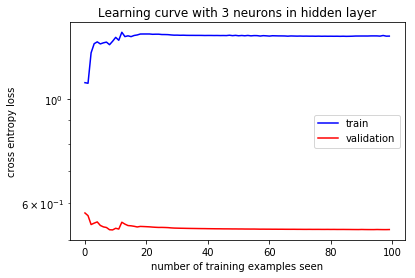

H =  6
Train Epoch: 0 Loss: 1.167738
Train Epoch: 10 Loss: 0.117327
Train Epoch: 20 Loss: 0.103895
Train Epoch: 30 Loss: 0.107807
Train Epoch: 40 Loss: 0.087177
Train Epoch: 50 Loss: 0.095586
Train Epoch: 60 Loss: 0.098056
Train Epoch: 70 Loss: 0.095390
Train Epoch: 80 Loss: 0.094565
Train Epoch: 90 Loss: 0.094222

Validation set: Avg. loss: 0.4112, Accuracy: 819/1000 (82%)



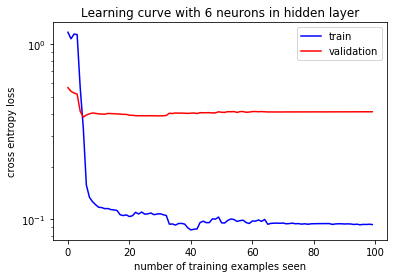

H =  10
Train Epoch: 0 Loss: 0.878845
Train Epoch: 10 Loss: 0.135551
Train Epoch: 20 Loss: 0.125888
Train Epoch: 30 Loss: 0.131789
Train Epoch: 40 Loss: 0.141615
Train Epoch: 50 Loss: 0.134959
Train Epoch: 60 Loss: 0.137384
Train Epoch: 70 Loss: 0.141218
Train Epoch: 80 Loss: 0.140785
Train Epoch: 90 Loss: 0.140853

Validation set: Avg. loss: 0.3770, Accuracy: 831/1000 (83%)



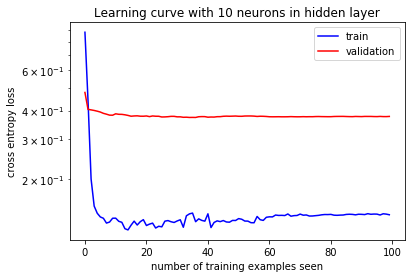

H =  30
Train Epoch: 0 Loss: 0.899817
Train Epoch: 10 Loss: 0.201000
Train Epoch: 20 Loss: 0.203245
Train Epoch: 30 Loss: 0.206246
Train Epoch: 40 Loss: 0.201956
Train Epoch: 50 Loss: 0.202803
Train Epoch: 60 Loss: 0.201421
Train Epoch: 70 Loss: 0.205232
Train Epoch: 80 Loss: 0.203523
Train Epoch: 90 Loss: 0.204305

Validation set: Avg. loss: 0.3500, Accuracy: 855/1000 (86%)



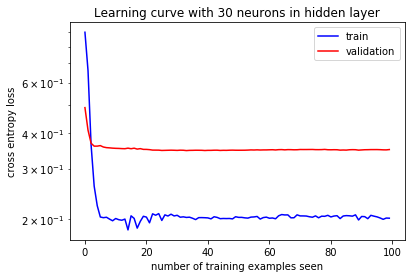

H =  60
Train Epoch: 0 Loss: 0.588547
Train Epoch: 10 Loss: 0.186352
Train Epoch: 20 Loss: 0.200079
Train Epoch: 30 Loss: 0.207578
Train Epoch: 40 Loss: 0.205516
Train Epoch: 50 Loss: 0.204603
Train Epoch: 60 Loss: 0.202058
Train Epoch: 70 Loss: 0.204130
Train Epoch: 80 Loss: 0.210118
Train Epoch: 90 Loss: 0.205718

Validation set: Avg. loss: 0.3496, Accuracy: 860/1000 (86%)



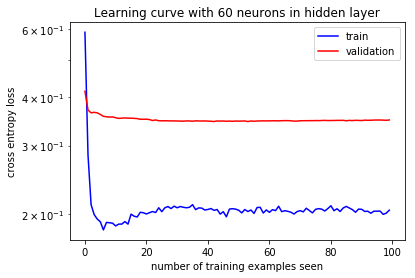

H =  100
Train Epoch: 0 Loss: 0.621448
Train Epoch: 10 Loss: 0.193277
Train Epoch: 20 Loss: 0.196588
Train Epoch: 30 Loss: 0.200666
Train Epoch: 40 Loss: 0.204566
Train Epoch: 50 Loss: 0.204251
Train Epoch: 60 Loss: 0.200907
Train Epoch: 70 Loss: 0.202377
Train Epoch: 80 Loss: 0.199592
Train Epoch: 90 Loss: 0.199337

Validation set: Avg. loss: 0.3483, Accuracy: 860/1000 (86%)



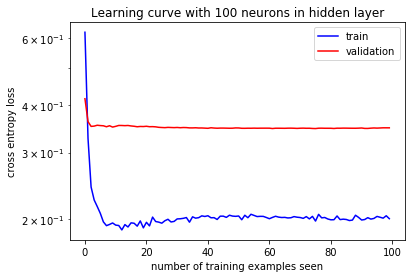

In [9]:
learning_rate = 0.01
epochs = 100
show_step = 10
for H in [3, 6, 10, 30, 60, 100]:
    print("H = ", H)
    train_losses = []
    val_losses = []
    
    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )
    
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    
    for epoch in range(epochs):
        model.train()
        for idx, (data, target) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = model(data)
            loss = F.binary_cross_entropy(output, target)
            loss.backward()
            optimizer.step()
        if epoch % show_step == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(epoch, loss.item()))
        train_losses.append(loss.item())        
    
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_val, dtype=torch.float),
                                             torch.tensor(y_val, dtype=torch.float)):
                output = model(data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('\nValidation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with {} neurons in hidden layer'.format(H))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

H =  30 Learning rate: 0.006
Train Epoch: 0 Loss: 1.018315
Train Epoch: 10 Loss: 0.947394
Train Epoch: 20 Loss: 0.580685
Train Epoch: 30 Loss: 0.299455
Train Epoch: 40 Loss: 0.187519
Train Epoch: 50 Loss: 0.146205
Train Epoch: 60 Loss: 0.129476
Train Epoch: 70 Loss: 0.121091
Train Epoch: 80 Loss: 0.115088
Train Epoch: 90 Loss: 0.113142
Train Epoch: 100 Loss: 0.112163
Train Epoch: 110 Loss: 0.111542
Train Epoch: 120 Loss: 0.110917
Train Epoch: 130 Loss: 0.108503
Train Epoch: 140 Loss: 0.106841
Train Epoch: 150 Loss: 0.105889
Train Epoch: 160 Loss: 0.104049
Train Epoch: 170 Loss: 0.103538
Train Epoch: 180 Loss: 0.102212
Train Epoch: 190 Loss: 0.101174
Train Epoch: 200 Loss: 0.101091
Train Epoch: 210 Loss: 0.099758
Train Epoch: 220 Loss: 0.099594
Train Epoch: 230 Loss: 0.099630
Train Epoch: 240 Loss: 0.099333
Train Epoch: 250 Loss: 0.098701
Train Epoch: 260 Loss: 0.097823
Train Epoch: 270 Loss: 0.096654
Train Epoch: 280 Loss: 0.094374
Train Epoch: 290 Loss: 0.088378

Validation set: Avg. 

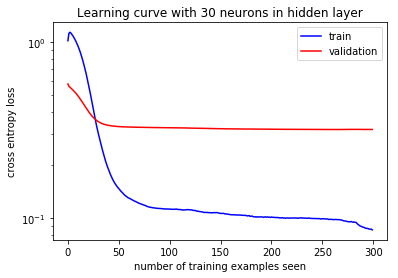

H =  30 Learning rate: 0.01
Train Epoch: 0 Loss: 1.223335
Train Epoch: 10 Loss: 0.707771
Train Epoch: 20 Loss: 0.284427
Train Epoch: 30 Loss: 0.154567
Train Epoch: 40 Loss: 0.113379
Train Epoch: 50 Loss: 0.101492
Train Epoch: 60 Loss: 0.096426
Train Epoch: 70 Loss: 0.095104
Train Epoch: 80 Loss: 0.092366
Train Epoch: 90 Loss: 0.093070
Train Epoch: 100 Loss: 0.093300
Train Epoch: 110 Loss: 0.093421
Train Epoch: 120 Loss: 0.091884
Train Epoch: 130 Loss: 0.091693
Train Epoch: 140 Loss: 0.092098
Train Epoch: 150 Loss: 0.089571
Train Epoch: 160 Loss: 0.086308
Train Epoch: 170 Loss: 0.086043
Train Epoch: 180 Loss: 0.084255
Train Epoch: 190 Loss: 0.080883
Train Epoch: 200 Loss: 0.080605
Train Epoch: 210 Loss: 0.080840
Train Epoch: 220 Loss: 0.081248
Train Epoch: 230 Loss: 0.080281
Train Epoch: 240 Loss: 0.081342
Train Epoch: 250 Loss: 0.080806
Train Epoch: 260 Loss: 0.078483
Train Epoch: 270 Loss: 0.078814
Train Epoch: 280 Loss: 0.079193
Train Epoch: 290 Loss: 0.079722

Validation set: Avg. l

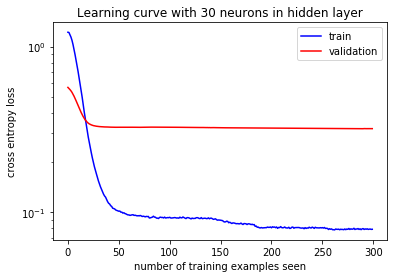

H =  30 Learning rate: 0.03
Train Epoch: 0 Loss: 1.030203
Train Epoch: 10 Loss: 0.147071
Train Epoch: 20 Loss: 0.115612
Train Epoch: 30 Loss: 0.119800
Train Epoch: 40 Loss: 0.117217
Train Epoch: 50 Loss: 0.122195
Train Epoch: 60 Loss: 0.118626
Train Epoch: 70 Loss: 0.124008
Train Epoch: 80 Loss: 0.128185
Train Epoch: 90 Loss: 0.131370
Train Epoch: 100 Loss: 0.133690
Train Epoch: 110 Loss: 0.131405
Train Epoch: 120 Loss: 0.123946
Train Epoch: 130 Loss: 0.123887
Train Epoch: 140 Loss: 0.121899
Train Epoch: 150 Loss: 0.124390
Train Epoch: 160 Loss: 0.121008
Train Epoch: 170 Loss: 0.123074
Train Epoch: 180 Loss: 0.125291
Train Epoch: 190 Loss: 0.125366
Train Epoch: 200 Loss: 0.127362
Train Epoch: 210 Loss: 0.127651
Train Epoch: 220 Loss: 0.127306
Train Epoch: 230 Loss: 0.125926
Train Epoch: 240 Loss: 0.127888
Train Epoch: 250 Loss: 0.128064
Train Epoch: 260 Loss: 0.126469
Train Epoch: 270 Loss: 0.126607
Train Epoch: 280 Loss: 0.126616
Train Epoch: 290 Loss: 0.127122

Validation set: Avg. l

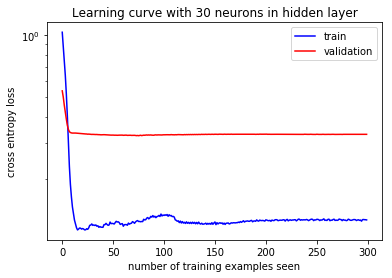

In [10]:
epochs = 300
show_step = 10
H = 30
models = [None, None, None]
i = 0
for learning_rate in [0.006, 0.01, 0.03]:
    print("H = ", H, "Learning rate:", learning_rate)
    train_losses = []
    val_losses = []
    
    models[i] = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )
    
    optimizer = optim.SGD(models[i].parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        models[i].train()
        for idx, (data, target) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = models[i](data)
            loss = F.binary_cross_entropy(output, target)
            loss.backward()
            optimizer.step()
        if epoch % show_step == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(epoch, loss.item()))
        train_losses.append(loss.item())        
    
        models[i].eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_val, dtype=torch.float),
                                             torch.tensor(y_val, dtype=torch.float)):
                output = models[i](data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('\nValidation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    i += 1
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with {} neurons in hidden layer'.format(H))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

In [11]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in zip(torch.tensor(X_test, dtype=torch.float),
                             torch.tensor(y_test, dtype=torch.float)):
        output = model(data)
        test_loss += F.binary_cross_entropy(output, target, size_average=False).item()
        pred = torch.round(output)
        correct += (1 if pred == target else 0)
    test_loss /= len(y_test)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    val_loss, correct, len(y_test),
    100. * correct / len(y_test)))


Test set: Avg. loss: 0.3303, Accuracy: 862/1000 (86%)



In [12]:
models = [None, None, None]
models[1] = model

Test Accuracy 0.86


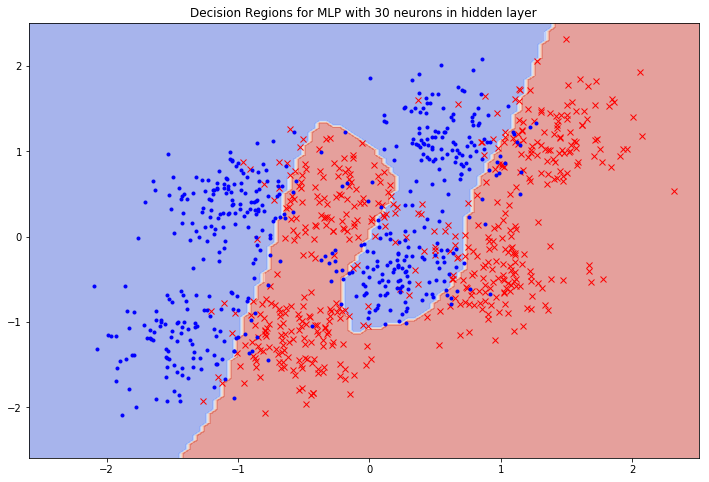

In [13]:
# Pass test data
X_test_t = torch.FloatTensor(X_test)
y_hat_test = models[1](X_test_t)
y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(y_test.reshape(-1,1)==y_hat_test_class) / len(y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

# Plot the decision boundary
# Determine grid range in x and y directions
x_min, x_max = X_train[:, 0].min()-0.3, X_train[:, 0].max()+0.3
y_min, y_max = X_train[:, 1].min()-0.3, X_train[:, 1].max()+0.3

# Set grid spacing parameter
spacing = min(x_max - x_min, y_max - y_min) / 100

# Create grid
XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

# Concatenate data to match input
data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))

# Pass data to predict method
data_t = torch.FloatTensor(data)
db_prob = models[1](data_t)

clf = np.where(db_prob<0.5,0,1)

Z = clf.reshape(XX.shape)

plt.figure(figsize=(12,8))
plt.title("Decision Regions for MLP with {} neurons in hidden layer".format(H))
plt.contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.plot(X_test[np.in1d(y_test, 1), 0], X_test[np.in1d(y_test, 1), 1], 'rx')
plt.plot(X_test[np.in1d(y_test, 0), 0], X_test[np.in1d(y_test, 0), 1], 'b.')
plt.show()

## 2 - Support-Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = SVC(gamma='scale')